In [93]:
pd.read_pickle(f'100_known_ts_all_descriptors.pkl')

,graph_id,edge_source,edge_dest,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,...,Feature79,Feature80,Feature81,Feature82,Feature83,Feature84,Feature85,Feature86,Feature87,is_causal
0,0,17,10,-0.016663,0.003996,0.173684,0.007324,0.000000,0.000000,0.000000,...,0.10101,-1.026892,-0.927014,-0.307808,-0.316999,-0.156444,0.084642,0.763134,0.599700,1
1,0,17,5,-0.010394,-0.010241,0.227266,0.001438,0.001525,0.000000,0.000000,...,0.10101,-1.026892,-0.930552,-0.307808,-0.313013,-0.346321,0.482483,-0.730339,-1.030181,1
2,0,17,11,0.001045,0.004467,0.181898,0.000000,0.000000,0.000000,0.000000,...,0.10101,-1.026892,-0.975272,-0.307808,-0.310782,-0.159311,0.080325,0.731927,0.638019,1
3,0,17,6,0.000973,-0.010787,0.220102,0.000000,0.001087,0.000000,0.000000,...,0.10101,-1.026892,-0.978868,-0.307808,-0.304878,-0.333991,0.489583,-0.748624,-1.028805,1
4,0,17,12,0.009356,0.004099,0.187427,0.000217,0.000000,0.000000,0.000000,...,0.10101,-1.026892,-1.006805,-0.307808,-0.309335,-0.142979,0.097630,0.753394,0.639627,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645995,1699,4,9,0.108382,1.529548,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.10101,92.890839,107.936234,-8.806625,-10.273652,-0.583330,-6.100507,-7.174567,53.041006,0
645996,1699,4,0,-0.318868,-0.118879,0.040600,0.012821,0.018333,0.009872,0.011881,...,0.10101,92.890839,82.392291,-8.806625,6.840586,-2.070830,3.802066,-21.227317,-44.083556,0
645997,1699,4,1,0.422673,-0.115768,0.000000,0.000149,0.004309,0.008603,0.010333,...,0.10101,92.890839,97.055329,-8.806625,9.826184,0.576345,1.832340,3.997864,-8.873437,0
645998,1699,4,2,0.080060,-0.108839,0.002196,0.000000,0.000000,0.000000,0.000000,...,0.10101,92.890839,102.807963,-8.806625,8.299537,-2.247416,-2.120781,-0.988770,33.289021,0


In [44]:
import pickle
import pandas as pd 


dfs_train = {}
dfs_test = {}
datas = {}
for i in range(1,18):
    # if i != 2:
        try:
            dfs_train[i] = pd.read_csv(f'20vars/100_known_ts_{i}_20_variables_descriptors.csv')
            # dfs_test[i] = pd.read_csv(f'test_100_known_ts_{i}_20_variables_descriptors.csv')
            with open(f'20vars/100_known_ts_{i}_20_variables.pkl','rb') as f:
                a,b,c,d = pickle.load(f)
            datas[i] = (a,b,c,d)
        except FileNotFoundError:
            pass

for i, single_df in dfs_train.items():
    single_df['graph_id'] = single_df['graph_id'] + (max(single_df['graph_id']) + 1) * (i-1)
df_train = pd.concat([dfs_train[i] for i in dfs_train.keys()]).reset_index(drop=True)

# for i, single_df in dfs_test.items():
#     single_df['graph_id'] = single_df['graph_id'] + (max(single_df['graph_id']) + 1) * (i-1)
# df_test = pd.concat([dfs_test[i] for i in dfs_test.keys()]).reset_index(drop=True)

In [45]:
for key, value in dfs_train.items():
    print(key, value.shape)

1 (6000, 92)
3 (6000, 92)
4 (6000, 92)
5 (6000, 92)
6 (6000, 92)
8 (6000, 92)
9 (6000, 92)
10 (6000, 92)
11 (6000, 92)
12 (6000, 92)
13 (6000, 92)
14 (6000, 92)
15 (6000, 92)
16 (6000, 92)
17 (6000, 92)


In [41]:
all_a = []
all_b = []
all_c = []
all_d = []
for i, data_tuple in datas.items():
    a,b,c,d = data_tuple
    all_a.extend(a)
    all_b.extend(b)
    all_c.extend(c)
    all_d.extend(d)

df_train.to_pickle('20vars/data_descriptors.pkl')
with open('20vars/data.pkl','wb') as f:
    pickle.dump((all_a,all_b,all_c,all_d),f)

In [5]:
import pandas as pd
def get_causal_dfs(dag, n_variables, maxlags):
        """
        Returns the causal dataframes.
        """
        
        pairs = [(source, effect) for source in range(n_variables, n_variables * maxlags + n_variables) for effect in range(n_variables)]
        multi_index = pd.MultiIndex.from_tuples(pairs, names=['source', 'target'])
        causal_dataframe = pd.DataFrame(index=multi_index, columns=['is_causal'])

        causal_dataframe['is_causal'] = 0

        # print(causal_dataframe)
        
        for parent_node, child_node in dag.edges:
            
            if '-' not in child_node:
                child_variable = int(child_node)
                child_lag = 0
            else:
                child_variable = int(child_node.split("_")[0])
                child_lag = int(child_node.split("-")[1])
            
            if child_variable < n_variables:
                corresponding_value_child = child_variable 
                parent_variable = int(parent_node.split("_")[0])
                parent_lag = int(parent_node.split("-")[1])
                corresponding_value_parent = parent_lag * n_variables + parent_variable

                causal_dataframe.loc[(corresponding_value_parent, corresponding_value_child), 'is_causal'] = 1
                

        return causal_dataframe

In [6]:
def custom_layout(G, n_nodes, t_lag):
    """
    Create a custom layout for the graph where nodes with the same identifier
    are aligned in the same column, regardless of their connections.
    """
    pos = {}
    width = 1.0 / (n_nodes - 1)
    height = 1.0 / (t_lag - 1)

    for node in G.nodes():
        if '_t-' in node:
            i, t = map(int, node.split('_t-'))
        else:
            i, t = int(node), 0
        pos[node] = (i * width, t * height)

    # Scale and center the positions
    pos = {node: (x * 10, y * 3) for node, (x, y) in pos.items()}
    return pos


def show_DAG(G):
    import networkx as nx
    import matplotlib.pyplot as plt
    # Using the custom layout for plotting
    plt.figure(figsize=(10, 6))
    pos_custom = custom_layout(G, 3, 3)
    nx.draw(G, pos_custom, with_labels=True, node_size=1000, node_color="lightpink", font_size=10, arrowsize=10)
    plt.title("Time Series DAG with Custom Layout")
    plt.show()
    
def dag_to_formula(dag):
    import networkx as nx
    formula = ""
    for node in nx.topological_sort(dag):
        if f"_t-" not in str(node):
            formula += f"{node} = "
            bias = dag.nodes[node]['bias']
            parents = list(dag.predecessors(node))
            for parent in parents:
                edge = dag.edges[parent, node]
                weight = edge['weight']
                formula += f"{weight}*{parent} + "
            formula += f"{bias}\n"
    print(formula)

In [31]:
import pandas as pd
import numpy as np
import pickle
import sys
sys.path.append('../d2c')
from d2c import D2C as D2C_
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score, balanced_accuracy_score

from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
#suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
# from lazypredict.Supervised import LazyClassifier

# key = 0
# df_test = dfs[key]
# df_train = pd.concat([dfs[i] for i in dfs.keys() if i != key])
# X_train = df_train.drop(columns=['graph_id','edge_source','edge_dest','is_causal'])
# y_train = df_train['is_causal']
# X_test = df_test.drop(columns=['graph_id','edge_source','edge_dest','is_causal'])
# y_test = df_test['is_causal']


# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(X_train, X_test, y_train, y_test)
# models

In [12]:
results = pd.DataFrame(columns=['test gen process','accuracy_train','ber_train', 'precision_train', 'recall_train', 'f1_train', 'auc_train', 'accuracy_test', 'ber_test', 'precision_test', 'recall_test', 'f1_test', 'auc_test'])
for key, value in dfs_train.items():
    
    df_test = dfs_train[key]
    df_train = pd.concat([dfs_train[i] for i in dfs_train.keys() if i != key])

    X_train, y_train = df_train.drop(['graph_id','edge_source','edge_dest', 'is_causal'], axis=1), df_train['is_causal']
    X_test, y_test = df_train.drop(['graph_id','edge_source','edge_dest', 'is_causal'], axis=1), df_train['is_causal']
    
    brf = BalancedRandomForestClassifier(n_estimators=50, random_state=0, n_jobs=50)

    brf.fit(X_train, y_train)

    y_hat_train = brf.predict(X_train)
    y_hat_proba_train = brf.predict_proba(X_train)[:,1]

    accuracy_train = accuracy_score(y_train, y_hat_train)
    ber_train = 1 - balanced_accuracy_score(y_train, y_hat_train)
    precision_train = precision_score(y_train, y_hat_train)
    recall_train = recall_score(y_train, y_hat_train)
    f1_train = f1_score(y_train, y_hat_train)
    if len(np.unique(y_train)) == 1:
        auc_test = np.nan
    else:
        auc_train = roc_auc_score(y_train, y_hat_proba_train)

    y_hat = brf.predict(X_test)
    y_hat_proba = brf.predict_proba(X_test)[:,1]


    accuracy_test = accuracy_score(y_test, y_hat)
    ber_test = 1 - balanced_accuracy_score(y_test, y_hat)
    precision_test = precision_score(y_test, y_hat)
    recall_test = recall_score(y_test, y_hat)
    f1_test = f1_score(y_test, y_hat)

    if len(np.unique(y_test)) == 1:
        auc_test = np.nan
    else:
        auc_test = roc_auc_score(y_test, y_hat_proba)

    
    # results.loc['train'] = [accuracy_train, precision_train, recall_train, f1_train, auc_train]
    results.loc[len(results)] = [key, accuracy_train, ber_train, precision_train, recall_train, f1_train, auc_train, accuracy_test, ber_test, precision_test, recall_test, f1_test, auc_test]


In [13]:
results

,test gen process,accuracy_train,ber_train,precision_train,recall_train,f1_train,auc_train,accuracy_test,ber_test,precision_test,recall_test,f1_test,auc_test
0,1.0,0.988063,0.006187,0.747268,1.0,0.855356,0.999728,0.988063,0.006187,0.747268,1.0,0.855356,0.999728
1,2.0,1.000000,0.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.000000,1.000000,1.0,1.000000,1.000000
2,3.0,0.988503,0.005959,0.754290,1.0,0.859938,0.999736,0.988503,0.005959,0.754290,1.0,0.859938,0.999736
3,4.0,0.988550,0.005934,0.755049,1.0,0.860431,0.999738,0.988550,0.005934,0.755049,1.0,0.860431,0.999738
4,5.0,0.989168,0.005614,0.765160,1.0,0.866958,0.999748,0.989168,0.005614,0.765160,1.0,0.866958,0.999748
5,6.0,0.993137,0.003557,0.837200,1.0,0.911387,0.999849,0.993137,0.003557,0.837200,1.0,0.911387,0.999849
6,8.0,0.990904,0.004714,0.795097,1.0,0.885854,0.999803,0.990904,0.004714,0.795097,1.0,0.885854,0.999803
7,9.0,0.988681,0.005867,0.757169,1.0,0.861806,0.999743,0.988681,0.005867,0.757169,1.0,0.861806,0.999743
8,10.0,0.990660,0.004841,0.790748,1.0,0.883148,0.999857,0.990660,0.004841,0.790748,1.0,0.883148,0.999857
9,11.0,0.988974,0.005715,0.761953,1.0,0.864896,0.999778,0.988974,0.005715,0.761953,1.0,0.864896,0.999778


In [23]:
X, y = df.drop(['graph_id','edge_source','edge_dest', 'is_causal'], axis=1), df['is_causal']
clf = BalancedRandomForestClassifier(n_estimators=200, random_state=0, n_jobs=50)
clf.fit(X, y)

#feature importances plot
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.DataFrame(clf.feature_importances_,
                                      index = X.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
                    


<Axes: >

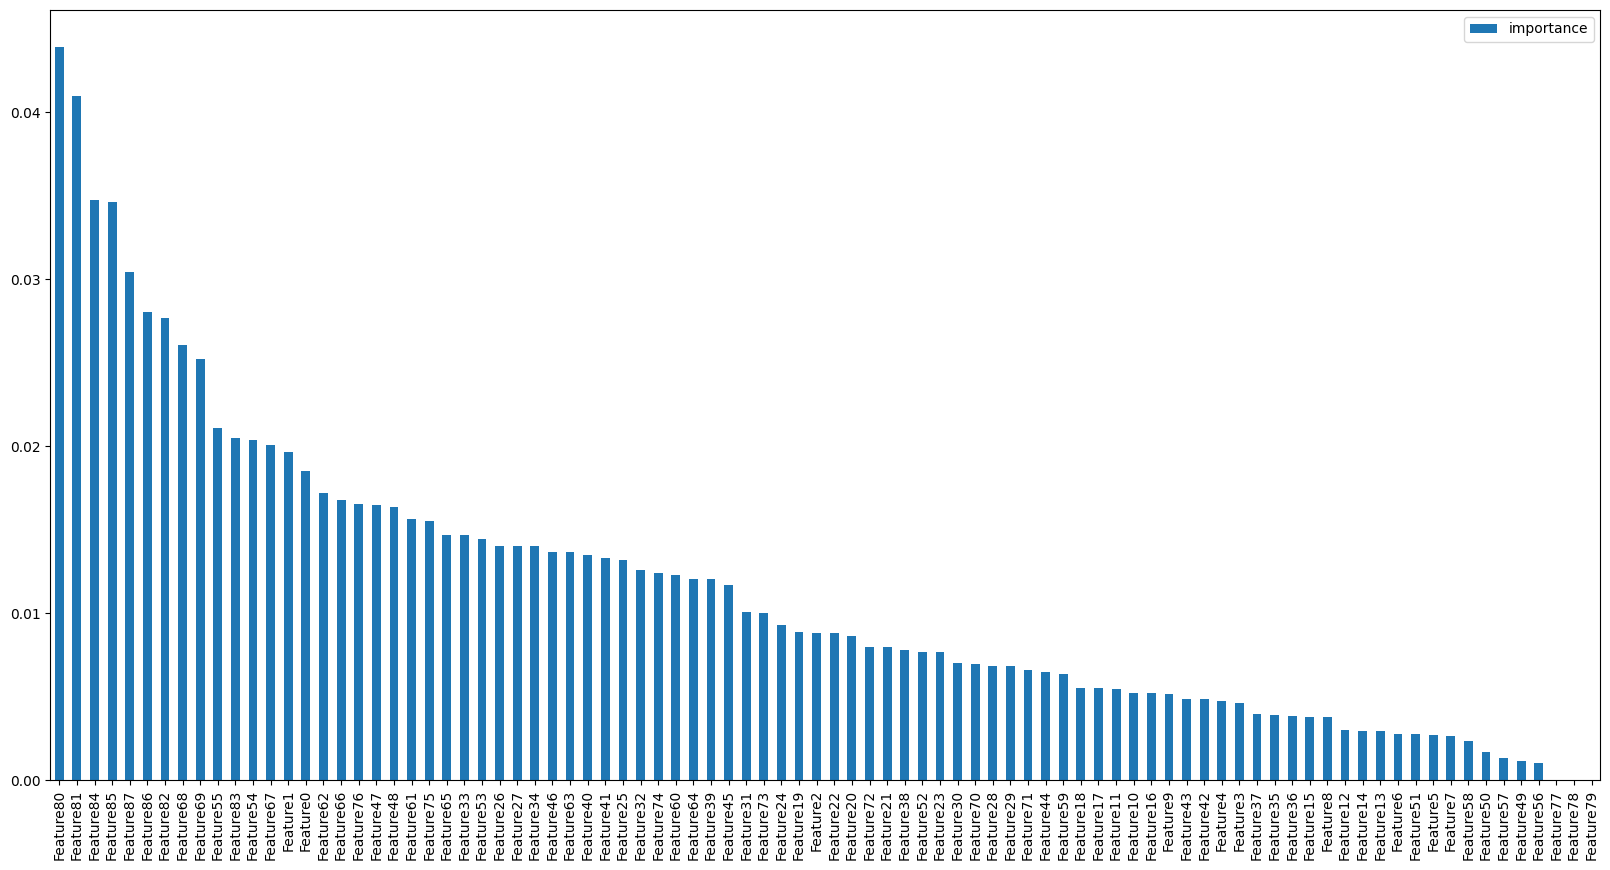

In [25]:
feature_importances.plot(kind='bar', figsize=(20,10))

In [21]:
pd.DataFrame(ns)

,500,1000,5000,10000,20000,50000
0,0.800993,0.853731,0.856659,0.809082,0.817084,0.847156
1,0.572942,0.633231,0.658693,0.659470,0.664336,0.672542
2,0.744673,0.634470,0.831338,0.736326,0.782703,0.764666
3,0.731715,0.706480,0.771799,0.762389,0.785120,0.787508
4,0.683239,0.670989,0.709804,0.730615,0.740933,0.745854
5,0.546171,0.595920,0.654666,0.651408,0.660801,0.670983
6,0.533973,0.537850,0.550028,0.576017,0.592522,0.601338
7,0.628649,0.644826,0.690207,0.702939,0.708813,0.715835
8,0.826007,0.853230,0.875882,0.890163,0.893009,0.896798
9,0.547710,0.570288,0.611629,0.605251,0.594071,0.605325


In [22]:
#suppress fture warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [23]:
#regularization classifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# mlp classifier
from sklearn.neural_network import MLPClassifier

#classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [24]:
df = pd.concat([df_train, df_test]).reset_index(drop=True)

In [65]:
df = pd.concat([dfs[i] for i in dfs.keys()]).reset_index(drop=True)

In [66]:
df.is_causal.value_counts()

0    585475
1     60525
Name: is_causal, dtype: int64

In [67]:
df.to_pickle('test_known_ts_all_descriptors.pkl')

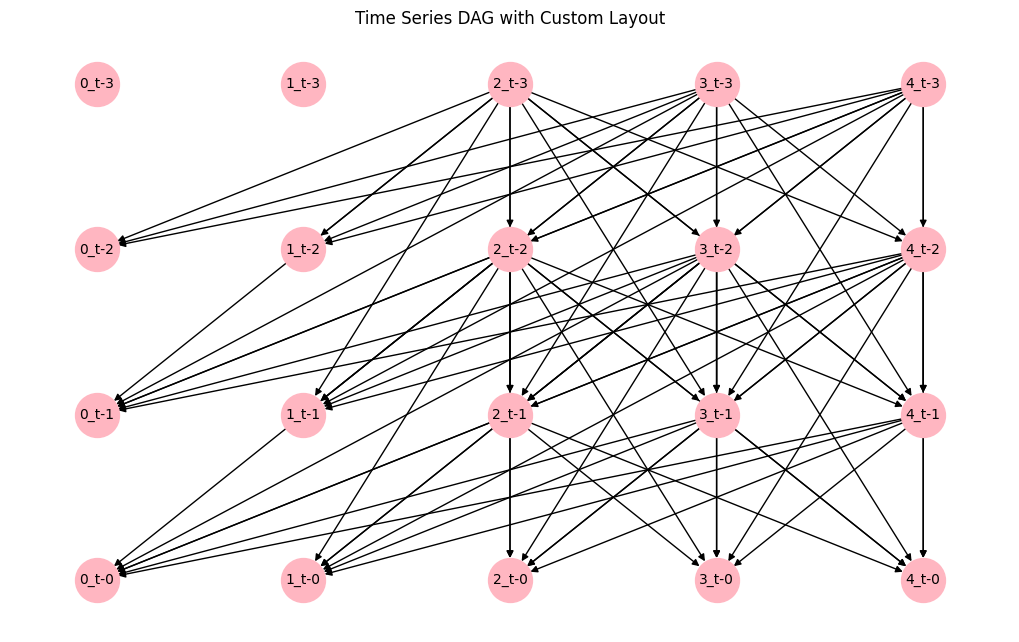

In [70]:
show_DAG(all_c[0])

In [71]:
all_d[0].T

source    5              6               ... 18             19            
target     0  1  2  3  4  0  1  2  3  4  ...  0  1  2  3  4  0  1  2  3  4
is_causal  0  0  0  0  0  0  0  0  0  0  ...  1  1  1  1  1  1  1  1  1  1

[1 rows x 75 columns]

In [40]:
df.loc[df.graph_id == 0].is_causal.value_counts()

0    305
1     75
Name: is_causal, dtype: int64

In [46]:
a = df.loc[df.graph_id == 0]
a.loc[a.edge_source ==19]

,graph_id,edge_source,edge_dest,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,...,Feature79,Feature80,Feature81,Feature82,Feature83,Feature84,Feature85,Feature86,Feature87,is_causal
361,0,19,0,-0.003396,-0.015052,0.660528,0.000000,0.000000e+00,0.000594,0.001187,...,0.10101,-0.611468,-0.952958,-0.393381,-0.312181,0.147207,0.035872,-1.384313,-1.350733,0
362,0,19,1,0.004997,-0.009906,0.656253,0.000000,0.000000e+00,0.000000,0.000000,...,0.10101,-0.611468,-0.980639,-0.393381,-0.316002,0.159849,0.021563,-1.352016,-1.316313,0
363,0,19,2,-0.037993,-0.011733,0.675297,0.016382,0.000000e+00,0.000000,0.000000,...,0.10101,-0.611468,-1.026892,-0.393381,-0.307808,0.147176,0.036842,-1.364077,-1.359372,0
364,0,19,3,0.006696,-0.007888,0.658128,0.000000,0.000000e+00,0.000000,0.000000,...,0.10101,-0.611468,-0.969300,-0.393381,-0.322956,0.158118,0.020727,-1.381410,-1.311707,0
365,0,19,4,-0.014928,-0.007308,0.664306,0.000000,0.000000e+00,0.000000,0.000000,...,0.10101,-0.611468,-1.020333,-0.393381,-0.286074,0.140702,0.031681,-1.356001,-1.324520,0
366,0,19,5,0.013344,0.008413,0.185577,0.006828,0.000000e+00,0.000000,0.000000,...,0.10101,-0.611468,-0.927014,-0.393381,-0.316999,0.511163,-0.371488,-1.025833,-0.636477,0
367,0,19,6,-0.010851,0.004243,0.200015,0.000000,0.000000e+00,0.011149,0.012595,...,0.10101,-0.611468,-0.975272,-0.393381,-0.310782,0.501322,-0.348484,-0.999610,-0.672268,0
368,0,19,7,-0.007156,0.008018,0.195419,0.000000,0.000000e+00,0.000000,0.000000,...,0.10101,-0.611468,-1.006805,-0.393381,-0.309335,0.489261,-0.352159,-0.998500,-0.653353,0
369,0,19,8,0.001808,0.007476,0.192303,0.000000,0.000000e+00,0.000000,0.000000,...,0.10101,-0.611468,-0.974926,-0.393381,-0.311587,0.491724,-0.359725,-1.002843,-0.626881,0
370,0,19,9,-0.007064,0.007082,0.196534,0.002262,0.000000e+00,0.000000,0.000000,...,0.10101,-0.611468,-1.002458,-0.393381,-0.285899,0.485944,-0.362007,-0.989675,-0.634098,0


In [72]:
n_variables = 5
X = df.drop(['is_causal'], axis=1)
y = df['is_causal']
#train test split 
logo = LeaveOneGroupOut()
groups = df['graph_id']
brf_scores = pd.DataFrame(columns=['accuracy_train','precision_train','recall_train', 'f1_train', 'auc_train', 'accuracy_test', 'precision_test', 'recall_test', 'f1_test', 'auc_test'])
counter = 0
predicted_values = {}
predicted_probabilities = {}
real_values = {}
for train_index, test_index in logo.split(X, y, groups):
    current_group = groups[test_index[0]]

    X_train, y_train = X.iloc[train_index], y[train_index]
    X_test, y_test = X.iloc[test_index], y[test_index]
    test_set = pd.concat([X_test, y_test], axis=1)

    #flattening
    test_set = test_set[(test_set['edge_dest'] < n_variables) & (test_set['edge_source'] >= n_variables)].sort_values(by=['graph_id','edge_source', 'edge_dest'])
   
    
    X_train.drop(columns=['graph_id','edge_source','edge_dest'], inplace=True)
    X_test.drop(columns=['graph_id','edge_source','edge_dest'], inplace=True)


    brf = BalancedRandomForestClassifier(n_estimators=50, max_depth=10, random_state=0, n_jobs=50)
    # brf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=0, n_jobs=50)
    brf.fit(X_train, y_train)

    accuracy_train = brf.score(X_train, y_train)
    precision_train = precision_score(y_train, brf.predict(X_train))
    recall_train = recall_score(y_train, brf.predict(X_train))
    f1_train = f1_score(y_train, brf.predict(X_train))
    if len(np.unique(y_train)) == 1:
        auc_test = np.nan
    else:
        auc_train = roc_auc_score(y_train, brf.predict_proba(X_train)[:,1])

    y_hat = brf.predict(X_test)
    y_hat_proba = brf.predict_proba(X_test)[:,1]
    

    accuracy_test = brf.score(X_test, y_test)
    precision_test = precision_score(y_test, y_hat)
    recall_test = recall_score(y_test, y_hat)
    f1_test = f1_score(y_test, y_hat)
    
    if len(np.unique(y_test)) == 1:
        auc_test = np.nan
    else:
        auc_test = roc_auc_score(y_test, y_hat_proba)

    predicted_values[len(brf_scores)] = y_hat
    predicted_probabilities[len(brf_scores)] = y_hat_proba
    real_values[len(brf_scores)] = y_test


    brf_scores.loc[len(brf_scores)] = [accuracy_train, precision_train, recall_train, f1_train, auc_train, accuracy_test, precision_test, recall_test, f1_test, auc_test]


    counter += 1
    print(counter)
    if counter == 20:
        break


/tmp/ipykernel_45627/547199869.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns=['graph_id','edge_source','edge_dest'], inplace=True)
/tmp/ipykernel_45627/547199869.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns=['graph_id','edge_source','edge_dest'], inplace=True)


1


/tmp/ipykernel_45627/547199869.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns=['graph_id','edge_source','edge_dest'], inplace=True)
/tmp/ipykernel_45627/547199869.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns=['graph_id','edge_source','edge_dest'], inplace=True)


2


/tmp/ipykernel_45627/547199869.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns=['graph_id','edge_source','edge_dest'], inplace=True)
/tmp/ipykernel_45627/547199869.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns=['graph_id','edge_source','edge_dest'], inplace=True)


3


/tmp/ipykernel_45627/547199869.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns=['graph_id','edge_source','edge_dest'], inplace=True)
/tmp/ipykernel_45627/547199869.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns=['graph_id','edge_source','edge_dest'], inplace=True)


4


/tmp/ipykernel_45627/547199869.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns=['graph_id','edge_source','edge_dest'], inplace=True)
/tmp/ipykernel_45627/547199869.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns=['graph_id','edge_source','edge_dest'], inplace=True)


5


/tmp/ipykernel_45627/547199869.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns=['graph_id','edge_source','edge_dest'], inplace=True)
/tmp/ipykernel_45627/547199869.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns=['graph_id','edge_source','edge_dest'], inplace=True)


6


/tmp/ipykernel_45627/547199869.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns=['graph_id','edge_source','edge_dest'], inplace=True)
/tmp/ipykernel_45627/547199869.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns=['graph_id','edge_source','edge_dest'], inplace=True)


7


/tmp/ipykernel_45627/547199869.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns=['graph_id','edge_source','edge_dest'], inplace=True)
/tmp/ipykernel_45627/547199869.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns=['graph_id','edge_source','edge_dest'], inplace=True)


8


/tmp/ipykernel_45627/547199869.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns=['graph_id','edge_source','edge_dest'], inplace=True)
/tmp/ipykernel_45627/547199869.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns=['graph_id','edge_source','edge_dest'], inplace=True)


9


/tmp/ipykernel_45627/547199869.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns=['graph_id','edge_source','edge_dest'], inplace=True)
/tmp/ipykernel_45627/547199869.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns=['graph_id','edge_source','edge_dest'], inplace=True)


10


/tmp/ipykernel_45627/547199869.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns=['graph_id','edge_source','edge_dest'], inplace=True)
/tmp/ipykernel_45627/547199869.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns=['graph_id','edge_source','edge_dest'], inplace=True)


KeyboardInterrupt: 

In [73]:
brf_scores

,accuracy_train,precision_train,recall_train,f1_train,auc_train,accuracy_test,precision_test,recall_test,f1_test,auc_test
0,0.707427,0.227933,0.890041,0.362924,0.873622,0.868421,0.6,1.0,0.750000,0.943432
1,0.707983,0.228301,0.890190,0.363403,0.873614,0.868421,0.6,1.0,0.750000,0.955104
2,0.707108,0.227896,0.891199,0.362973,0.873650,0.868421,0.6,1.0,0.750000,0.887607
3,0.716832,0.233164,0.883339,0.368943,0.874768,0.736842,0.2,1.0,0.333333,0.911493
4,0.708581,0.228697,0.890339,0.363916,0.873968,0.868421,0.6,1.0,0.750000,0.912874
5,0.708556,0.228697,0.890455,0.363926,0.874304,0.868421,0.6,1.0,0.750000,0.891825
6,0.713658,0.231426,0.885669,0.366964,0.874834,0.736842,0.2,1.0,0.333333,0.861070
7,0.710709,0.229758,0.888321,0.365088,0.874165,0.868421,0.6,1.0,0.750000,0.940153
8,0.714033,0.231596,0.885157,0.367134,0.874979,0.736842,0.2,1.0,0.333333,0.797070
9,0.709196,0.229254,0.891563,0.364723,0.874558,0.868421,0.6,1.0,0.750000,0.976328


In [31]:
brf_scores

,accuracy_train,precision_train,recall_train,f1_train,auc_train,accuracy_test,precision_test,recall_test,f1_test,auc_test
0,0.707427,0.227933,0.890041,0.362924,0.873622,0.868421,0.6,1.0,0.750000,0.943432
1,0.707983,0.228301,0.890190,0.363403,0.873614,0.868421,0.6,1.0,0.750000,0.955104
2,0.707108,0.227896,0.891199,0.362973,0.873650,0.868421,0.6,1.0,0.750000,0.887607
3,0.716832,0.233164,0.883339,0.368943,0.874768,0.736842,0.2,1.0,0.333333,0.911493
4,0.708581,0.228697,0.890339,0.363916,0.873968,0.868421,0.6,1.0,0.750000,0.912874
5,0.708556,0.228697,0.890455,0.363926,0.874304,0.868421,0.6,1.0,0.750000,0.891825
6,0.713658,0.231426,0.885669,0.366964,0.874834,0.736842,0.2,1.0,0.333333,0.861070
7,0.710709,0.229758,0.888321,0.365088,0.874165,0.868421,0.6,1.0,0.750000,0.940153
8,0.714033,0.231596,0.885157,0.367134,0.874979,0.736842,0.2,1.0,0.333333,0.797070
9,0.709196,0.229254,0.891563,0.364723,0.874558,0.868421,0.6,1.0,0.750000,0.976328


In [42]:
scores = pd.read_csv('100_known_ts_1_20_variables_scores.csv')

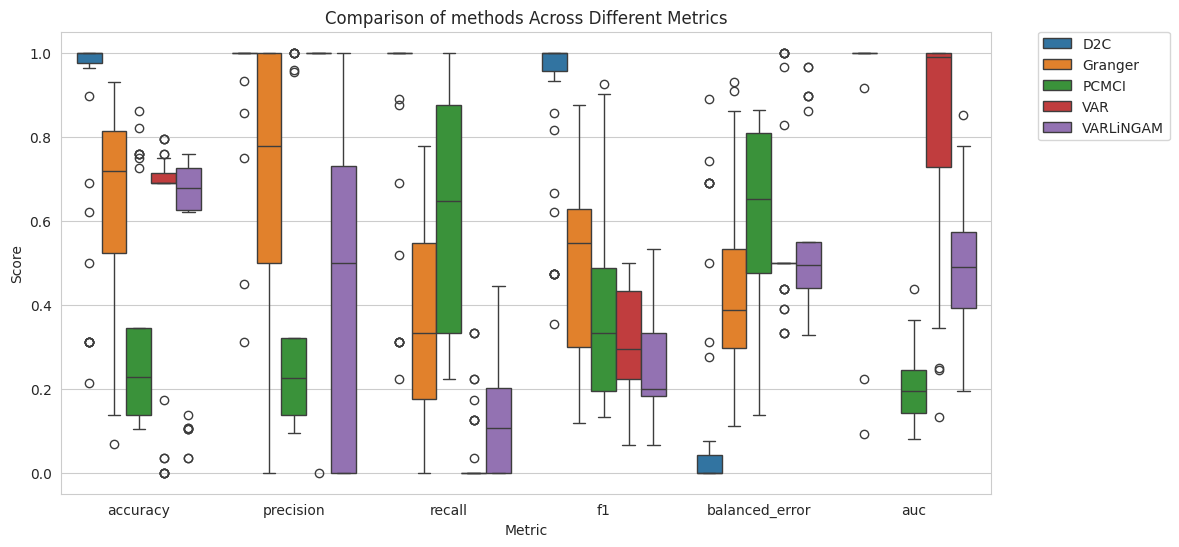

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='Metric', y='Score', hue='Model', data=scores.reset_index(drop=True))
plt.title("Comparison of methods Across Different Metrics")
#legend outside the box
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)